In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [191]:
df=pd.read_csv('insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [192]:
df.tail()

,age,affordibility,bought_insurance
23,45,1,1
24,50,1,1
25,54,1,1
26,23,1,0
27,46,1,0


In [193]:
df.shape

(28, 3)

In [194]:
df.isna().sum()

age                 0
affordibility       0
bought_insurance    0
dtype: int64

In [195]:
df.ndim

2

In [196]:
df.dtypes

age                 int64
affordibility       int64
bought_insurance    int64
dtype: object

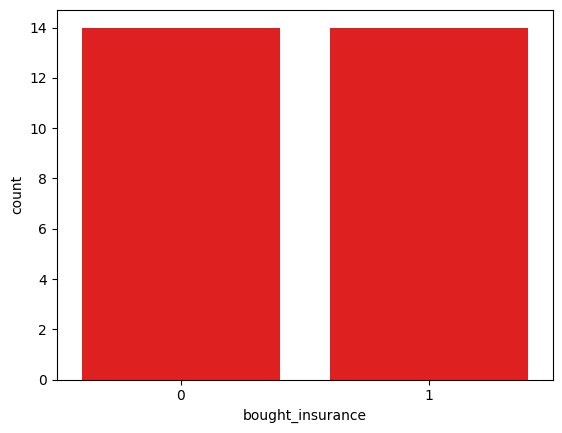

In [197]:
sns.countplot(x='bought_insurance',data=df,color='red')
plt.show()

In [198]:
x=df.drop(['bought_insurance'],axis=1)
y=df['bought_insurance']

Splittind data into training and testing data
---

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [200]:
len(x_train)

19

In [201]:
len(x_test)

9

In [202]:
x_train_scaled=x_train.copy()
x_train_scaled['age']=x_train_scaled['age']/100

x_test_scaled=x_test.copy()
x_test_scaled['age']=x_test_scaled['age']/100

The age should be between 0 and 1 which help to get good accuracy

So we should do normalization(scaling)

In [203]:
x_train_scaled

,age,affordibility
13,0.29,0
15,0.55,1
1,0.25,0
4,0.46,1
5,0.56,1
2,0.47,1
16,0.25,0
23,0.45,1
3,0.52,0
26,0.23,1


In [204]:
x_test_scaled

,age,affordibility
9,0.61,1
25,0.54,1
8,0.62,1
21,0.26,0
0,0.22,1
12,0.27,0
17,0.58,1
22,0.40,1
11,0.28,1


Model Creation
---

In [205]:
from keras.models import Sequential
from keras.layers import Dense

Architecture building

In [206]:
ann=Sequential()

# Input layer
ann.add(Dense(units=2,activation='relu'))

# Hidden layer
ann.add(Dense(10,activation='relu'))
ann.add(Dense(6,activation='relu'))

# Output layer
ann.add(Dense(units=1,activation='sigmoid'))

In [207]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [208]:

ann.fit(x_train_scaled,y_train,epochs=200,batch_size=4)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4737 - loss: 0.6945  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.6936 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.6925 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.6922 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4737 - loss: 0.6911 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.6906 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4737 - loss: 0.6901 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.6895 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.6891 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5263 - loss: 0.6886 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7368 - loss: 0.6881 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7368 - lo

In [209]:
ann.evaluate(x_test_scaled,y_test,batch_size=5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.3588


[0.35880768299102783, 1.0]

In [210]:
ann.predict(x_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.86505806],
       [0.8246416 ],
       [0.87014186],
       [0.4013607 ],
       [0.4013607 ],
       [0.4013607 ],
       [0.84879297],
       [0.6718081 ],
       [0.47868186]], dtype=float32)

In [211]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
17    1
22    1
11    0
Name: bought_insurance, dtype: int64

Weights and Bias checking:
---

In [212]:
ann.get_weights()


[array([[ 1.3700078 , -0.7284986 ],
        [ 0.37225723,  0.3091608 ]], dtype=float32),
 array([-0.15325932,  0.0507625 ], dtype=float32),
 array([[ 0.38405606,  0.44394654,  0.7838368 ,  0.4433471 ,  0.27940214,
         -0.36134076,  0.2611149 ,  0.5360978 , -0.17472737,  0.59215665],
        [ 0.5777295 ,  0.35598335, -0.6261316 , -0.30794036,  0.05178685,
         -0.33272696, -0.0950383 , -0.629857  ,  0.45760462,  0.00965492]],
       dtype=float32),
 array([ 0.09301154,  0.09880275, -0.11716186, -0.12709135,  0.0765944 ,
         0.        , -0.10556214, -0.12201411, -0.0264738 , -0.1349268 ],
       dtype=float32),
 array([[-0.10104739, -0.14411573,  0.14132196, -0.4115309 , -0.57198   ,
         -0.5959418 ],
        [-0.28105202, -0.04207681, -0.00745249, -0.60038507,  0.35277718,
          0.05045867],
        [ 0.5341544 ,  0.84531915,  0.33863437, -0.3843972 , -0.579007  ,
          0.34494787],
        [ 0.76257473,  0.4676482 , -0.542829  ,  0.47728986,  0.1359812 ,
   